In [1]:
from equpy import ChemicalReaction, EquationSystem
from utils import eq_system_builder
import numpy as np
import matplotlib.pyplot as plt
import time
np.seterr(invalid="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
"""
Example #1: Manual input of reactions in symbolic form
"""
reactions = ['A + 2B = AB2',
    'AB2 + C = AB2C']

mass_conservation = ['A + AB2 + AB2C',
                'B + 2AB2 + 2AB2C',
                'C + AB2C']

K = [1, 10]
S = [1,2,3]
eq_system = EquationSystem(reactions, mass_conservation)
reaction = ChemicalReaction(eq_system, K, S)

start_time = time.time()
for j in range(10000):
    x, delta = reaction.solve(20, 1e2, 0)
print("")
print("execution time --- %s milliseconds ---" % ((time.time() - start_time)/j*1000))
print("")

reaction.plotter()

AttributeError: 'tuple' object has no attribute 'species'

In [ ]:
from chempy import Equilibrium
from chempy.chemistry import Species
from chempy.equilibria import EqSystem
from collections import defaultdict

r0 = Equilibrium({'CH4'}, {'C', '4H'}, 1)  # unit "molar" assumed
r1 = Equilibrium({'CH4P'}, {'CH4', 'P'}, 10)  # same here
substances = [Species.from_formula(f) for f in 'C H CH4 CH4P'.split()]
eqsys = EqSystem([r0, r1], substances)

print('\n'.join(map(str, eqsys.rxns)))  # "rxns" short for "reactions"
init_conc = defaultdict(float, {'C': 1, 'H': 2, 'P': 3})
x, sol, sane = eqsys.root(init_conc)
assert sol['success'] and sane
print(', '.join('%.2g' % v for v in x))


ValueError: Composition violation (1: -4) in CH4 = 4H + C

In [ ]:
from chempy import Equilibrium
from chempy.chemistry import Species
water_autop = Equilibrium({'H2O'}, {'H+', 'OH-'}, 10**-14)  # unit "molar" assumed
ammonia_prot = Equilibrium({'NH4+'}, {'NH3', 'H+'}, 10**-9.24)  # same here
substances = [Species.from_formula(f) for f in 'H2O OH- H+ NH3 NH4+'.split()]
eqsys = EqSystem([water_autop, ammonia_prot], substances)
print('\n'.join(map(str, eqsys.rxns)))  # "rxns" short for "reactions"

init_conc = defaultdict(float, {'H2O': 1, 'NH3': 0.1})

start_time = time.time()
for i in range(1000):
    x, sol, sane = eqsys.root(init_conc)
print("")
print("execution time --- %s milliseconds ---" % ((time.time() - start_time)/i*1000))
print("")

assert sol['success'] and sane
print(', '.join('%.2g' % v for v in x))


H2O = H+ + OH-; 1e-14
NH4+ = H+ + NH3; 5.75e-10

execution time --- 10.820120065897196 milliseconds ---

1, 0.0013, 7.6e-12, 0.099, 0.0013


In [ ]:
x[0]+1*x[2]+1*x[4]

1.0

In [ ]:
eqsys

<ipython-input-59-421bb91c0b99>:18: UserWarning: Tolerance not reached. Manually check if the result is satisfying. Either change starting point, increase iterations or weight.
  x, delta = reaction.solve(20, 1e2, 0.5)



execution time --- 1.7422391129685595 milliseconds ---

[7.56399029e-12 9.98707581e-01 9.87076775e-02 1.29748365e-03
 1.32034488e-03]


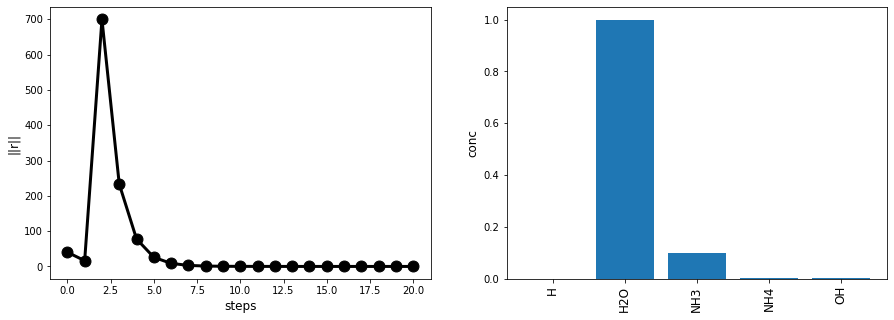

In [ ]:
"""
Example #1: Manual input of reactions in symbolic form
"""
reactions = ['OH + H = H2O',
    'NH3 + H = NH4']

mass_conservation = ['H2O + OH',
                     'H2O + H + NH4',
                     'NH3 + NH4']

K = [1e14, 10**(9.24)]
S = [1, 1, 0.1]
N, C, species = eq_system_builder(reactions, mass_conservation)
reaction = ChemicalReaction(species, N, K, C, S)

start_time = time.time()
for j in range(1000):
    x, delta = reaction.solve(20, 1e2, 0.5)
print("")
print("execution time --- %s milliseconds ---" % ((time.time() - start_time)/j*1000))
print("")

print(x)

reaction.plotter()

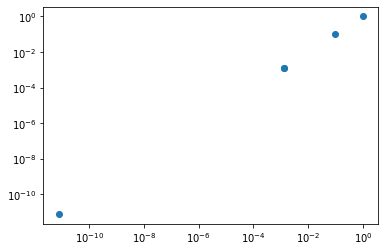

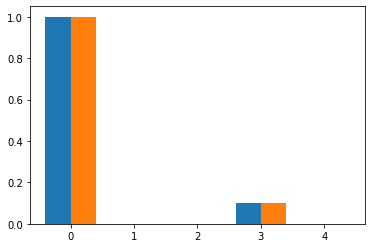

In [ ]:
plt.scatter([1, 0.0013, 7.6e-12, 0.099, 0.0013], [x[1], x[4], x[0], x[2], x[3]])
plt.xscale('log')
plt.yscale('log')
plt.show()

chempy_x = np.array([1, 0.0013, 7.6e-12, 0.099, 0.0013])
my_x = np.array([x[1], x[4], x[0], x[2], x[3]])

plt.bar(np.arange(len(x)) - 0.2, chempy_x, 0.4)
plt.bar(np.arange(len(x)) + 0.2, my_x, 0.4)
plt.show()

In [ ]:
N

array([[-1.,  1.,  0.,  0., -1.],
       [-1.,  0., -1.,  1.,  0.]])

3.9340160012851723e-16

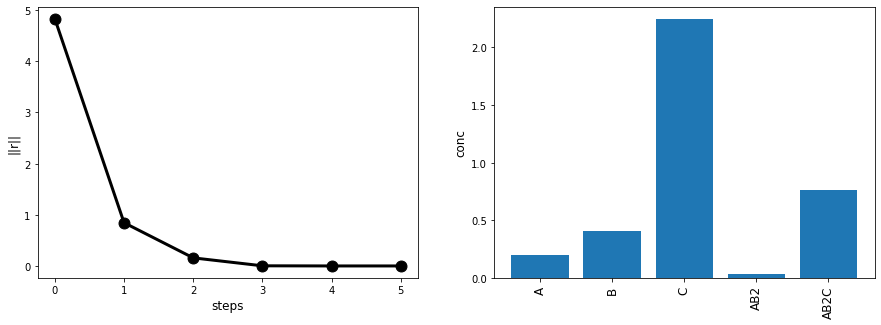

In [ ]:
from equpy import ChemicalReaction
from utils import eq_system_builder
import numpy as np
import matplotlib.pyplot as plt
import time
np.seterr(invalid="ignore");

"""
Example #2: Manual input of reactions in matrix form
"""
N = np.array([[-1, -2, 0, 1, 0],[0, 0, -1, -1, 1]])
K = np.array([1, 10])
S = np.array([1, 2, 3])
C = np.array([[1, 0, 0, 1, 1],[0, 1, 0, 2, 2],[0, 0, 1, 0, 1]])

reaction = ChemicalReaction({'A':0, 'B':1, 'C':2, 'AB2':3, 'AB2C':4}, N, K, C, S)
x, delta = reaction.solve(30, 1e2, 0)
reaction.plotter()

np.linalg.norm(np.log(x)*1e-16)

<ipython-input-58-a738838c3c25>:21: UserWarning: Tolerance not reached. Manually check if the result is satisfying. Either change starting point, increase iterations or weight.
  x, delta = reaction.solve(1e1, 1e2, 2)



execution time --- 2.380027188672437 milliseconds ---



4.674505408407166e-15

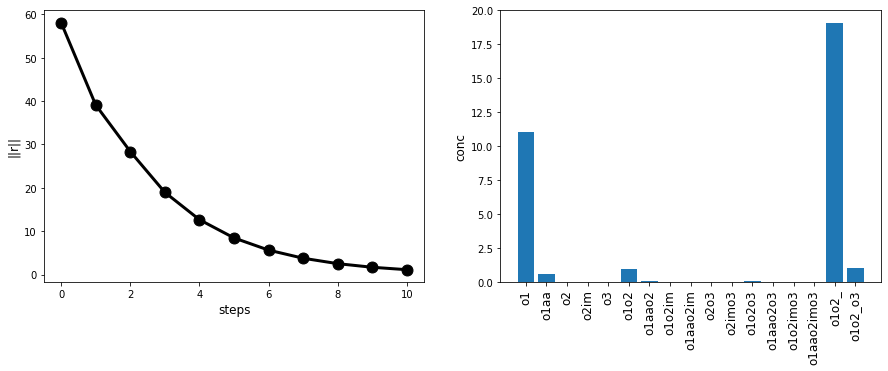

In [ ]:
"""
Example #3: Load reactions in matrix form from .csv file
"""
from utils import csv_loader
np.seterr(invalid="ignore");

filename_N = '/Users/todisco/Documents/Numerical_Wall_Implementation_Custom/case2/N.csv'
filename_C = '/Users/todisco/Documents/Numerical_Wall_Implementation_Custom/case2/C.csv'

N, K, C, S = csv_loader(filename_N, filename_C)

S = [10, 0.5, 1, 0.01, 1, 20]

lbls = ['o1', 'o1aa', 'o2', 'o2im', 'o3', 'o1o2', 'o1aao2', 'o1o2im', 'o1aao2im', 'o2o3', 'o2imo3', 'o1o2o3','o1aao2o3','o1o2imo3','o1aao2imo3','o1o2_','o1o2_o3'];
species = {i:lbl for lbl, i in enumerate(lbls)}

reaction = ChemicalReaction(species, N, K, C, S)

start_time = time.time()
for i in range(1000):
    x, delta = reaction.solve(1e1, 1e2, 2)
print("")
print("execution time --- %s milliseconds ---" % ((time.time() - start_time)/i*1000))
print("")

reaction.plotter()

np.linalg.norm(np.log(x)*1e-16)

In [ ]:
S

[1, 1, 0.1]